In [1]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 4
np.random.seed(seed)

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 1/10000]
E = [0.1, 0.2]
I = [0.1, 0.2]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1000 		 0.15 		 0.38 |
| 1000 		 0.36 		 0.48 |
| 1000 		 0.42 		 0.27 |
| 1000 		 0.25 		 0.31 |
| 1000 		 0.06 		 0.54 |
| 1000 		 0.15 		 0.43 |
| 1000 		 0.1 		 0.08 |
| 1000 		 0.05 		 0.16 |
| 1000 		 0.41 		 0.0 |
| 1000 		 0.08 		 0.01 |
| 1000 		 0.35 		 0.33 |
| 1000 		 0.14 		 0.4 |
| 1000 		 0.25 		 0.15 |
| 1000 		 0.07 		 0.14 |
| 1000 		 0.2 		 0.05 |
| 1000 		 0.26 		 0.09 |
| 1000 		 0.17 		 0.28 |
| 1000 		 0.15 		 0.49 |
| 1000 		 0.15 		 0.2 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of E is: 0.15
The s.d. of I is: 0.16
-------------------------------------
The mean of M is: 1000
The mean of E is: 0.2
The mean of I is: 0.2
-------------------------------------
The population mean parameters entered were: 1000, 0.1, 0.1
The population s.d. parameters entered were: 0.0001, 0.2, 0.2


#################################

C:\tools\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\tools\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\tools\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


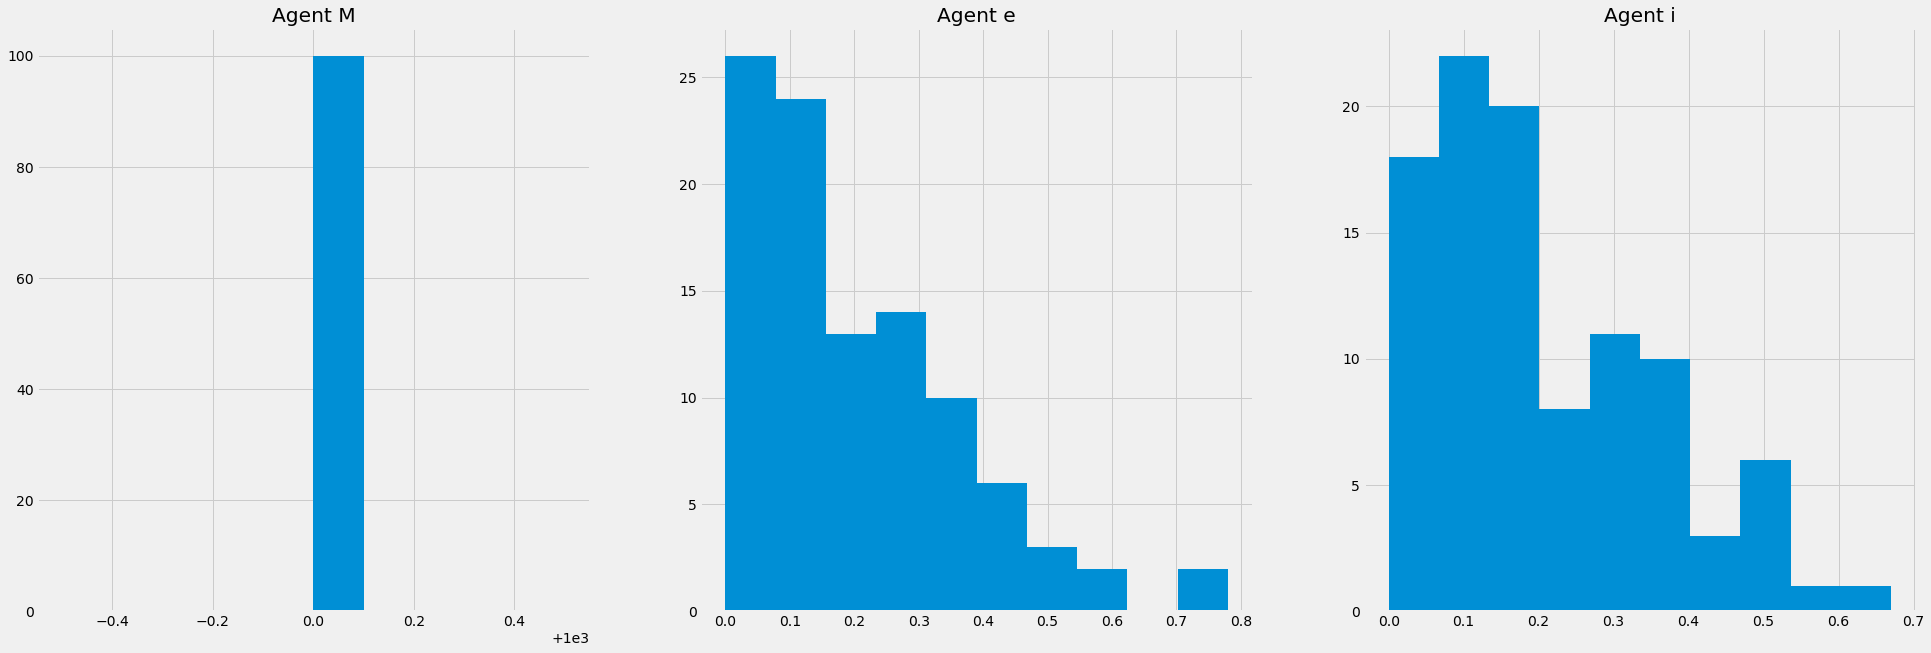

In [3]:
check_parameters(agents, M, E, I)

In [4]:
tournament_seed4_mm1000_me01_mi01_sdm0_sde02_sdi02 = Tournament.create_play_tournament(
                 countries = agents, 
                 max_rounds = 100000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 1,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )

Tournament has started...
Tournament has ended. The simulation took 180 minutes.


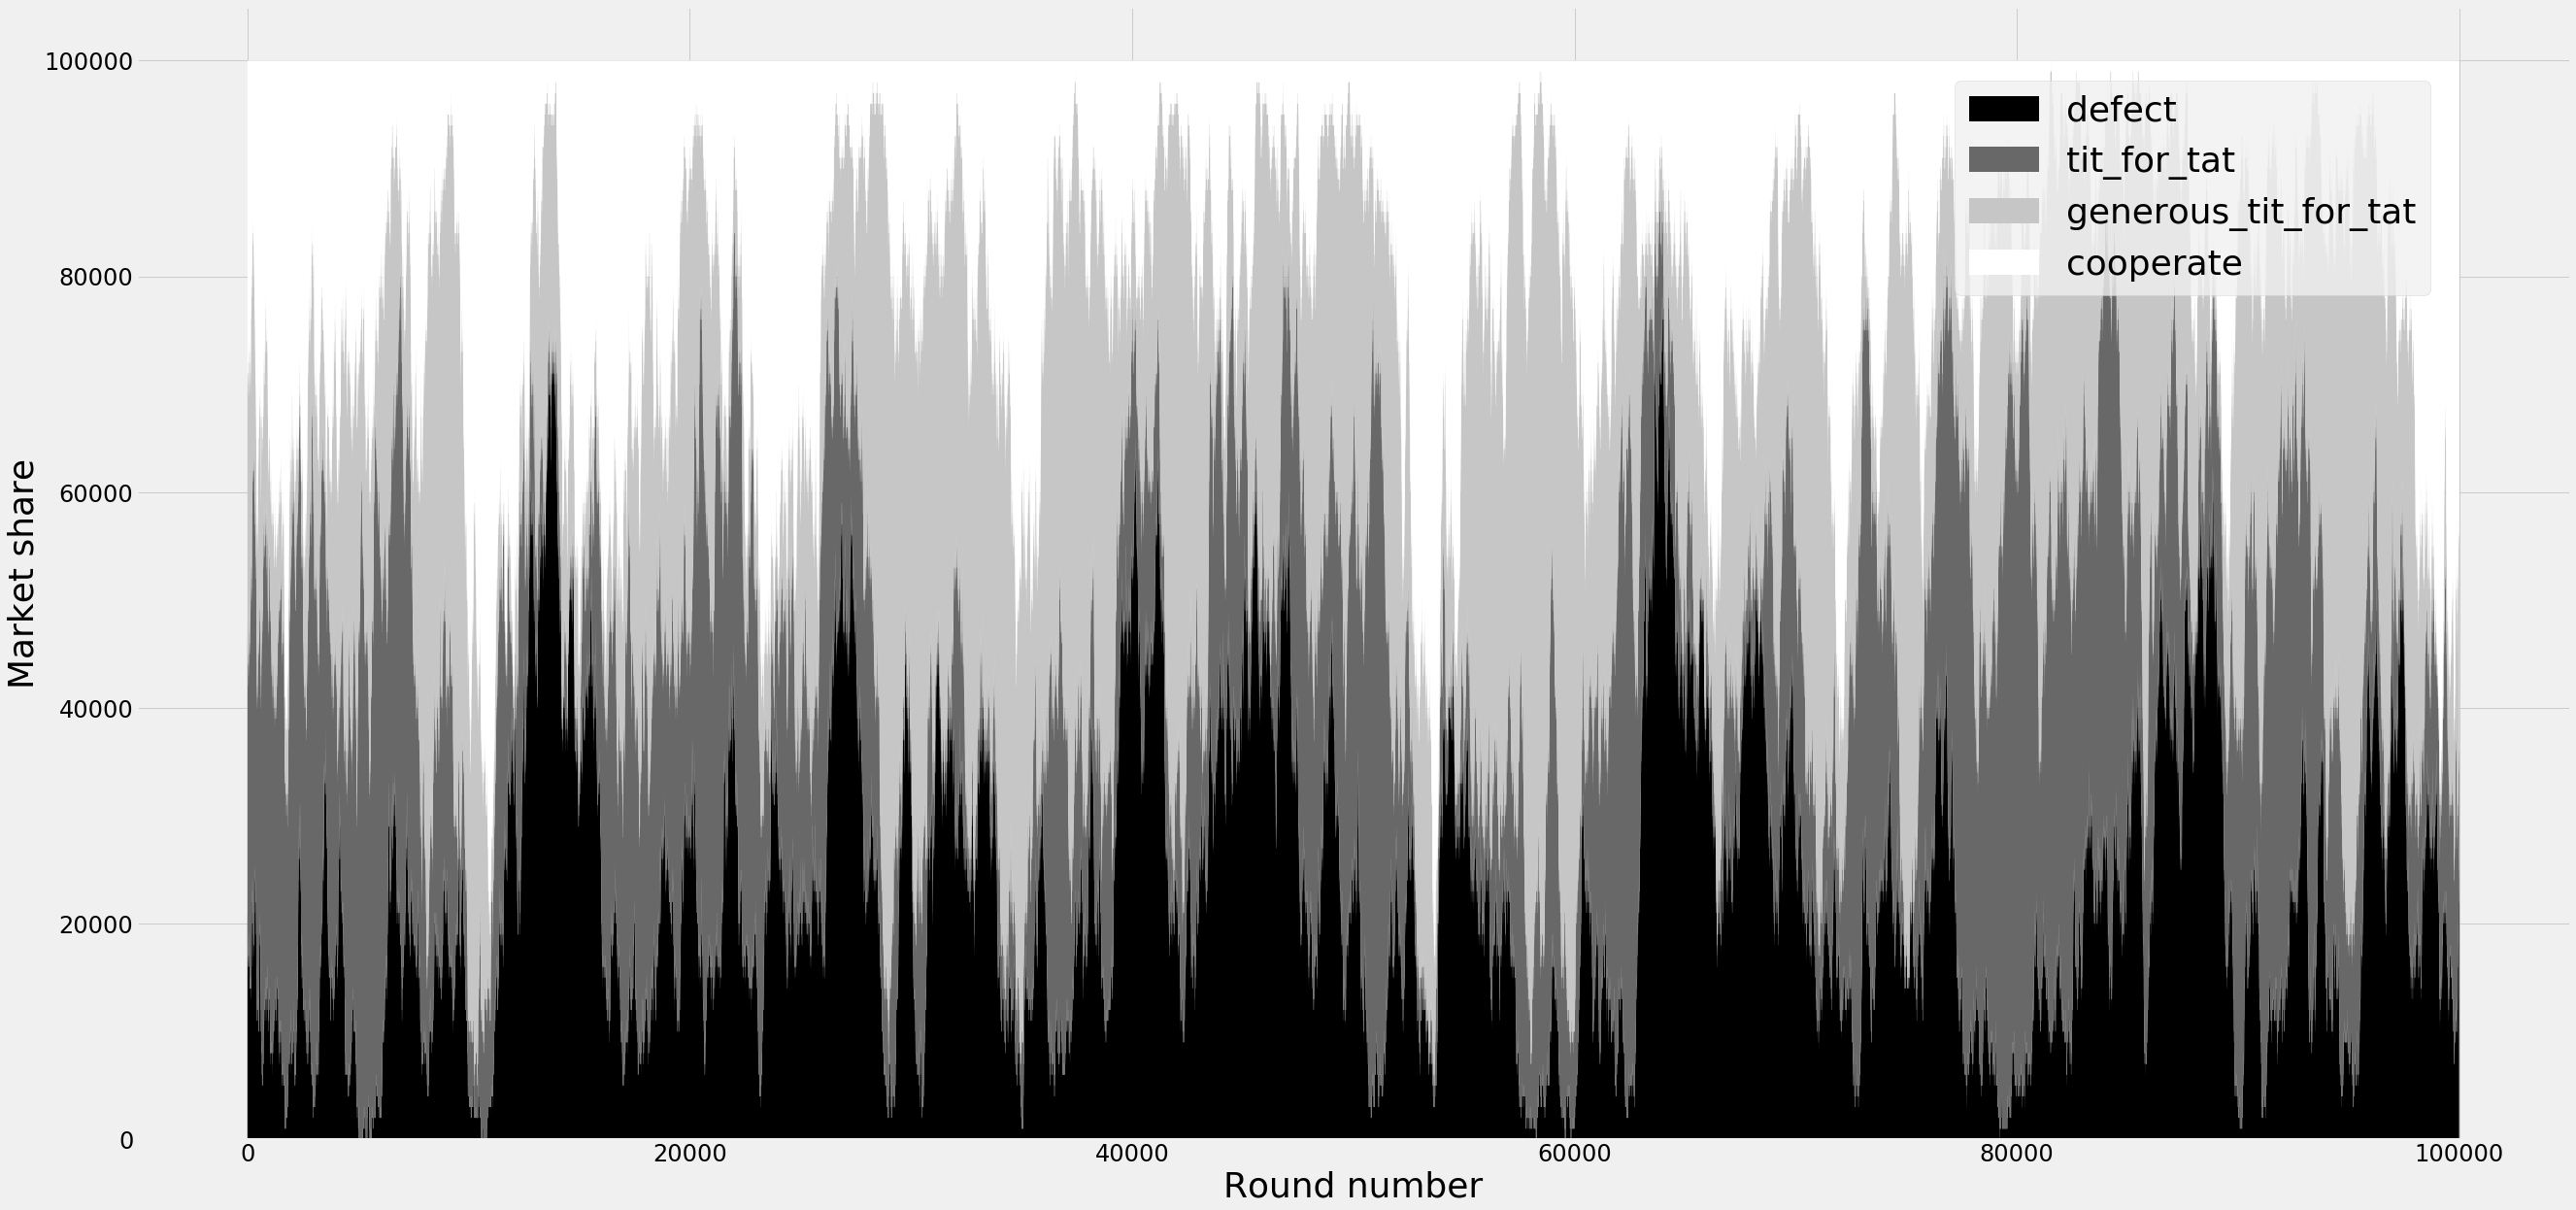

In [5]:
draw_stack(tournament_seed4_mm1000_me01_mi01_sdm0_sde02_sdi02)

C:\tools\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


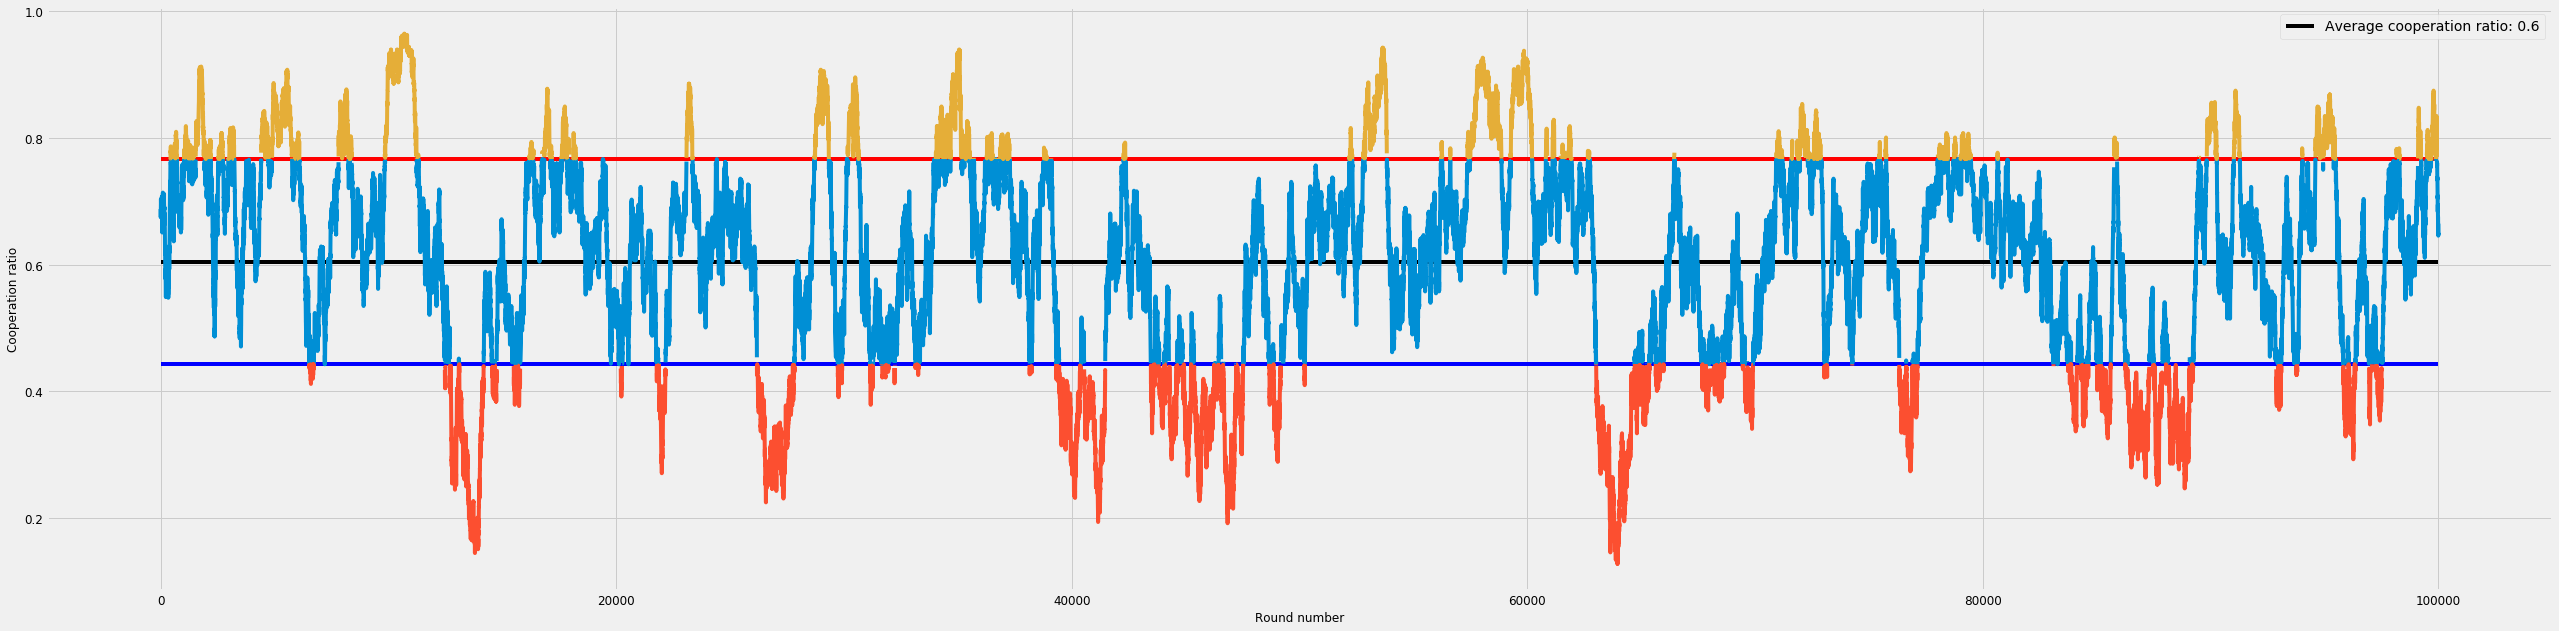

In [13]:
# we can change the constant of s.d.
C_D_ratios_per_round_var(tournament_seed4_mm1000_me01_mi01_sdm0_sde02_sdi02, constant = 1)

In [9]:
outliers = count_outliers(tournament_seed4_mm1000_me01_mi01_sdm0_sde02_sdi02, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_seed4_mm1000_me01_mi01_sdm0_sde02_sdi02_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')

    S.D.  Counts
0    0.5     863
1    0.6     748
2    0.7     691
3    0.8     700
4    0.9     728
5    1.0     676
6    1.1     590
7    1.2     516
8    1.3     473
9    1.4     387
10   1.5     323
11   1.6     282
12   1.7     225
13   1.8     196
14   1.9     192
15   2.0     124
16   2.1      99
17   2.2      64
18   2.3      38
19   2.4      22
20   2.5      18
21   2.6      38
22   2.7      18
23   2.8       8
24   2.9       1
25   3.0       0


In [11]:
save_cooperate_csv(tournament_seed4_mm1000_me01_mi01_sdm0_sde02_sdi02, type_of_tournament= "seed4_mm1000_me01_mi01_sdm0_sde02_sdi02", seed = str(seed))